<a href="https://colab.research.google.com/github/Niki025/CODE/blob/main/Google%20app%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/Google Apps data.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design


In [ ]:
n_duplicated = df.duplicated(subset=['App']).sum()
print("There are {}/{} duplicated records.".format(n_duplicated, df.shape[0]))
df_no_dup = df.drop(df.index[df.App.duplicated()], axis=0)
print("{} records after dropping duplicated.".format(df_no_dup.shape[0]))

There are 86/8276 duplicated records.
8190 records after dropping duplicated.


In [ ]:
print(set(df_no_dup.Type))
print("Dropping alien Type value '0', {} record(s) removed".format(sum(df_no_dup.Type == '0')))
df_no_dup = df_no_dup.drop(df_no_dup.index[df_no_dup.Type == '0'], axis=0)

{'Free', 'Paid'}
Dropping alien Type value '0', 0 record(s) removed


In [ ]:
print("NaA value statistics in each column")
print(df_no_dup.isnull().sum(axis=0),'\n')
df_no_dup = df_no_dup.dropna(subset=['Type'])
print("Column 'Type' with NaN values are dropped, {} records left.".format(df_no_dup.shape[0]))

df_rating = df_no_dup.dropna(subset=['Rating'])
print("Cleaned dataframe for 'Rating' has {} records.".format(df_rating.shape[0]))

NaA value statistics in each column
Unnamed: 0.1             0
Unnamed: 0               0
App                      0
Category                 0
Rating                   0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating         361
Last Updated             0
Current Ver              0
Minimum Android Ver      0
Genres                   0
dtype: int64 

Column 'Type' with NaN values are dropped, 8190 records left.
Cleaned dataframe for 'Rating' has 8190 records.


In [ ]:
df_rating = df_rating.loc[:,['Rating', 'Type', 'Category']]

In [ ]:
def plot_hist(df, col, bins=10):
    plt.hist(df[col], bins=bins)
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.title('Distribution of {}'.format(col))

def compute_app_types(df):
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)


def drop_categories(df):
    vc_rating = df.Category.value_counts()
    cats_to_drop = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        if n_free < 10 or n_paid < 10:
            cats_to_drop.append(cat)
    for cat in cats_to_drop:
        df.drop(df.query('Category == "{}"'.format(cat)).index, axis=0, inplace=True)
    print("Deleted categories: {}".format(cats_to_drop))
    return df

,Rating
count,8190.000000
mean,4.173321
std,0.536691
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


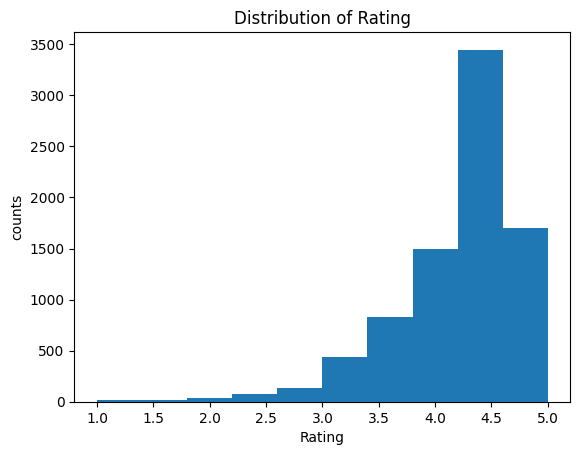

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_5, *['Rating', 'index'], **{'inner': 'stick'})
chart

In [ ]:
plot_hist(df_rating, 'Rating')
df_rating.describe()

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Rating'], **{})
chart

In [ ]:
print("There are {} free and {} paid apps in the the Rating dataframe ".format(*compute_app_types(df_rating)))

There are 7588 free and 602 paid apps in the the Rating dataframe 


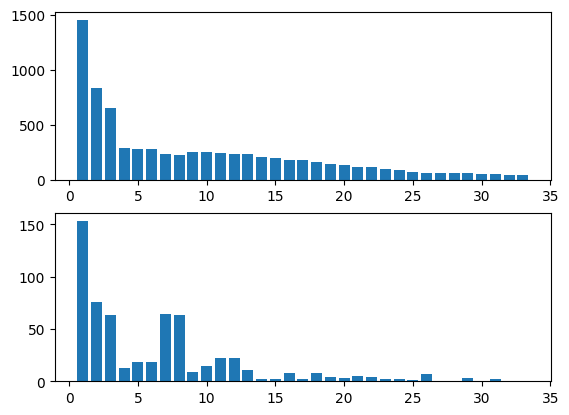

In [ ]:
plot_app_types(df_rating)

In [ ]:
df_rating = drop_categories(df_rating)
print("Cleaned Rating dataframe has {} datapoints".format(df_rating.shape[0]))

Deleted categories: ['Business', 'News And Magazines', 'Social', 'Travel And Local', 'Shopping', 'Books And Reference', 'Video Players', 'Dating', 'Maps And Navigation', 'Education', 'Entertainment', 'Food And Drink', 'Auto And Vehicles', 'Weather', 'Libraries And Demo', 'House And Home', 'Art And Design', 'Comics', 'Parenting', 'Events', 'Beauty']
Cleaned Rating dataframe has 5749 datapoints


In [ ]:
df_rating.describe()

,Rating
count,5749.000000
mean,4.173126
std,0.545003
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['Rating', 'index'], **{'inner': 'stick'})
chart